In [4]:
#Importing Required Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
#Reading data
game = pd.read_csv('chess_games.csv')
game.head(1)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation


In [6]:
#Checking thhe shape of the dataset
game.shape

(20058, 17)

In [7]:
#Dropping columns
data=game.drop(labels=['rated','victory_status','time_increment','white_id','black_id','moves','opening_fullname','opening_variation','opening_response'],axis=1)
data.shape

(20058, 8)

In [8]:
le = LabelEncoder()
target = le.fit_transform(data['winner'])
target

array([2, 0, 2, ..., 2, 2, 0])

In [9]:
le2 = LabelEncoder()
data['opening_shortname'] = le2.fit_transform(data['opening_shortname'])
data.head()

,game_id,turns,winner,white_rating,black_rating,opening_code,opening_moves,opening_shortname
0,1,13,White,1500,1191,D10,5,110
1,2,16,Black,1322,1261,B00,4,74
2,3,61,White,1496,1500,C20,3,61
3,4,61,White,1439,1454,D02,3,94
4,5,95,White,1523,1469,C41,5,83


In [10]:
# Checking for missing value counts
print(data.isnull().sum())

game_id              0
turns                0
winner               0
white_rating         0
black_rating         0
opening_code         0
opening_moves        0
opening_shortname    0
dtype: int64


In [11]:
data.dtypes

game_id               int64
turns                 int64
winner               object
white_rating          int64
black_rating          int64
opening_code         object
opening_moves         int64
opening_shortname     int32
dtype: object

<Axes: xlabel='opening_moves', ylabel='Count'>

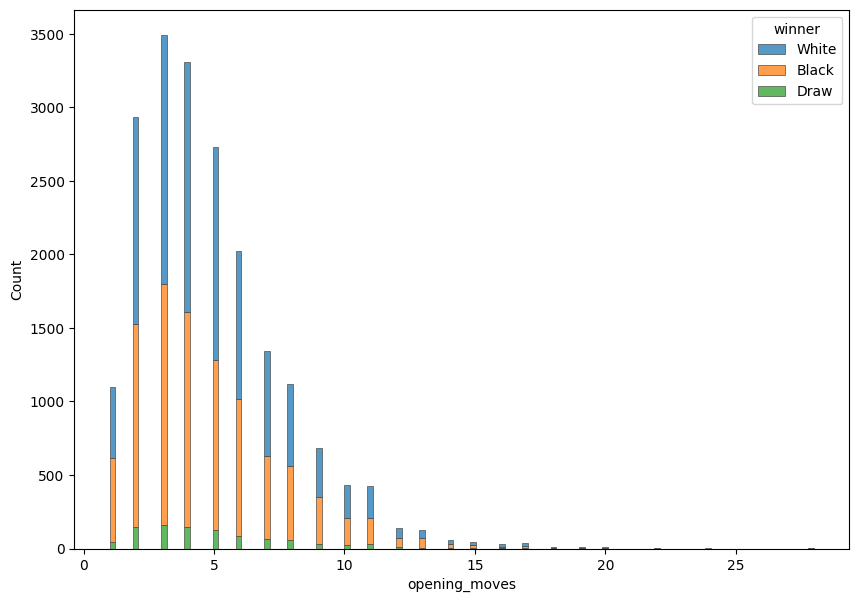

In [12]:
f, ax = plt.subplots(figsize=(10,7))
sns.histplot(x="opening_moves", hue="winner", data=data, multiple='stack', linewidth=0.5, edgecolor=".3")

In [13]:
# Function to split the dataset
def splitdataset(balance_data,target):
  
    # Separating the target variable
    X = balance_data.values[:,[1,3,4,6,7]]
    Y = target
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.15, random_state = 40)
      
    return X, Y, X_train, X_test, y_train, y_test

In [14]:
# Function to perform training with Decision Tree || giniIndex.
def train_using_gini(X_train, X_test, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=8, min_samples_leaf=8)
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with Decision Tree || entropy.
def train_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,max_depth=50, min_samples_leaf = 8)  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to perform training with SVM
def train_using_SVM(X_train, X_test, y_train):
    # Creating the SVM classifier object
    clf_SVM = SVC(kernel='rbf',C=1.4,gamma='scale')
    #Training SVM
    clf_SVM.fit(X_train, y_train) 
    return clf_SVM

# Function to perform training with Logistic Regression
def train_using_logistic(X_train, X_test, y_train):
    # Creating the Logistic classifier object
    clf_logistic = LogisticRegression(solver='liblinear')
    #Training Logistic classifier
    clf_logistic.fit(X_train, y_train)
    return clf_logistic

def train_using_randomforest(X_train, X_test, y_train):
    clf_randomF = RandomForestClassifier(n_estimators = 100)
    clf_randomF.fit(X_train, y_train)
    return clf_randomF

In [15]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred,"\n")
    return y_pred

In [16]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print ("\nAccuracy : ",
    accuracy_score(y_test,y_pred)*100)
    print("\n")
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [17]:
# Building Phase
X, Y, X_train, X_test, y_train, y_test = splitdataset(data,target)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
clf_SVM = train_using_SVM(X_train, X_test, y_train)
clf_logistic = train_using_logistic(X_train, X_test, y_train)
clf_randomF = train_using_randomforest(X_train, X_test, y_train)

In [18]:
print("Results Using Decision Tree || Gini Index:\n")
      
# Prediction using gini
y_pred_gini = prediction(X_test,clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Decision Tree || Gini Index:

Predicted values:
[2 2 2 ... 0 2 2] 


Accuracy :  62.97773346626786


Report :                precision    recall  f1-score   support

           0       0.64      0.52      0.57      1337
           1       0.40      0.01      0.03       142
           2       0.62      0.79      0.69      1530

    accuracy                           0.63      3009
   macro avg       0.56      0.44      0.43      3009
weighted avg       0.62      0.63      0.61      3009



In [19]:
print("Results Using Decision Tree || Entropy:\n")

# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Decision Tree || Entropy:

Predicted values:
[0 0 2 ... 2 0 0] 


Accuracy :  66.56696576935859


Report :                precision    recall  f1-score   support

           0       0.64      0.69      0.67      1337
           1       0.24      0.06      0.09       142
           2       0.70      0.70      0.70      1530

    accuracy                           0.67      3009
   macro avg       0.52      0.48      0.49      3009
weighted avg       0.65      0.67      0.66      3009



In [20]:
print("Results Using SVM Classifier:\n")

# Prediction using SVM
y_pred_SVM = prediction(X_test, clf_SVM)
cal_accuracy(y_test, y_pred_SVM)

Results Using SVM Classifier:

Predicted values:
[2 2 2 ... 2 2 2] 


Accuracy :  63.808574277168496


Report :                precision    recall  f1-score   support

           0       0.65      0.55      0.59      1337
           1       0.00      0.00      0.00       142
           2       0.63      0.77      0.70      1530

    accuracy                           0.64      3009
   macro avg       0.43      0.44      0.43      3009
weighted avg       0.61      0.64      0.62      3009



d:\Code\Projet-Data\3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Code\Projet-Data\3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Code\Projet-Data\3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print("Results Using Logistic Regression:\n")
      
# Prediction using Logistic Regression
y_pred_logistic = prediction(X_test,clf_logistic)
cal_accuracy(y_test, y_pred_logistic)

Results Using Logistic Regression:

Predicted values:
[2 2 2 ... 2 2 2] 


Accuracy :  63.34330342306414


Report :                precision    recall  f1-score   support

           0       0.62      0.59      0.61      1337
           1       0.50      0.01      0.01       142
           2       0.64      0.73      0.68      1530

    accuracy                           0.63      3009
   macro avg       0.59      0.44      0.43      3009
weighted avg       0.63      0.63      0.62      3009



In [22]:
print("Results Using Random Forest\n")
      
# Prediction using Random Forest
y_pred_randomF = prediction(X_test,clf_randomF)
cal_accuracy(y_test, y_pred_randomF)

Results Using Random Forest

Predicted values:
[2 0 2 ... 2 2 2] 


Accuracy :  67.56397474243934


Report :                precision    recall  f1-score   support

           0       0.66      0.67      0.66      1337
           1       0.58      0.13      0.21       142
           2       0.69      0.74      0.71      1530

    accuracy                           0.68      3009
   macro avg       0.64      0.51      0.53      3009
weighted avg       0.67      0.68      0.67      3009

